# Prediction Iris dataset
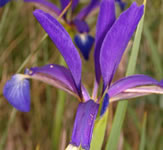

##My first project in data analysis and machine learning
### 1 - Data analysis

    1.1 - Load the data

    1.2 - Manipulating the data

    1.3 - Visualizing the data

### 2 - Machine Learning

    2.1 - Test predictions in data input

    2.2 Test result prediction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = "/content/iris.csv"

In [7]:
df = pd.read_csv(data)

In [8]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
df.shape

(149, 5)

In [10]:
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "target"]

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
df.shape

(149, 5)

In [13]:
df.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df.target.replace({"Iris-setosa":"setosa", "Iris-versicolor":"versicolour", "Iris-virginica":"virginica"},inplace=True)

In [15]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica
148,5.9,3.0,5.1,1.8,virginica


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   target        149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## EDA

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
df.corr()

<ipython-input-18-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [19]:
df.target.value_counts()

versicolour    50
virginica      50
setosa         49
Name: target, dtype: int64

## 2D scatterplot

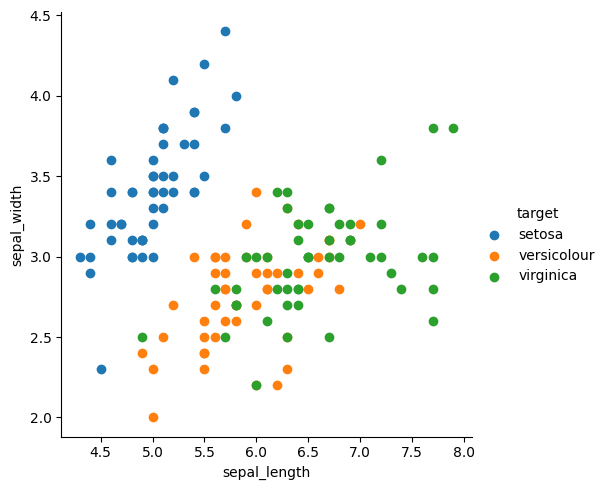

In [20]:
sns.FacetGrid(df, hue="target",height=5).map(plt.scatter,"sepal_length", "sepal_width").add_legend()

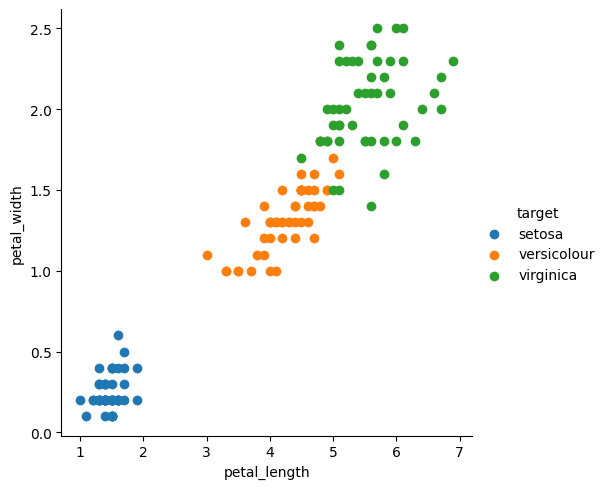

In [21]:
sns.FacetGrid(df, hue="target",height=5).map(plt.scatter,"petal_length", "petal_width").add_legend()

# pairplit

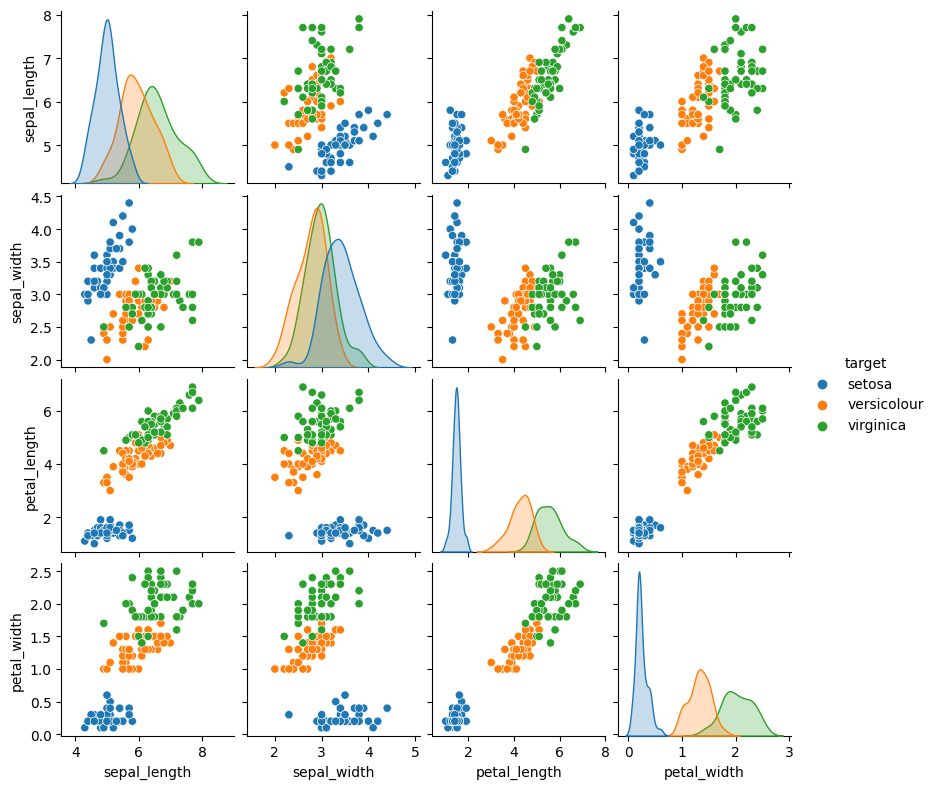

In [22]:
sns.pairplot(df,hue="target", height=2)

# histogram

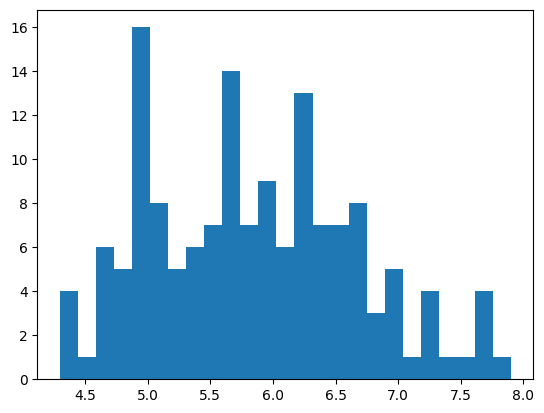

In [23]:
plt.hist(df["sepal_length"], bins=25);

# box-plot

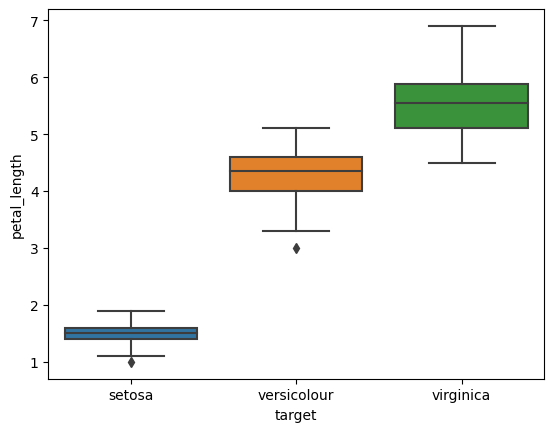

In [24]:
sns.boxplot(x="target", y="petal_length", data=df)
plt.show()

## preprocessing

In [25]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [33]:
X = df.drop(["target"], axis=1)

In [35]:
y = df["target"]


In [39]:
scaler = ss.fit(X)

In [40]:
X_std = scaler.transform(X)

In [41]:
X_std

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ],
       [-1.51163569,  0.8077768 , -1.35396443, -1.19326436],
       [-1.02726211,  0.8077768 , -1.29694332, -1.32506301],
       [-1.75382249, -0.34951881, -1.35396443, -1.32506301],
       [-1.1483555 ,  0.11339944, -1.29694332, -1.45686167],
       [-0.54288852,  1.50215416, -1.29694332, -1.32506301],
       [-1.2694489 ,  0.8077768 , -1.23992221, -1.32506301],
       [-1.2694489 , -0.11805969, -1.35396443, -1.45686167],
       [-1.87491588, -0.11805969, -1.52502777, -1.45686167],
       [-0.05851493,  2.19653152, -1.46800666, -1.32506301],
       [-0.17960833,  3.122368  , -1.29694332, -1.0614657 ],
       [-0.54288852,  1.9650724 , -1.41098555, -1.0614657 ],
       [-0.90616871,  1.

## Label encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
y = le.fit_transform(y)

In [46]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## spliting

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
X_train.value_counts().sum()

104

In [51]:
X_test.value_counts().sum()

45

## model selection

In [54]:
from sklearn.svm import SVC

In [58]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [59]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_pred, y_test)

0.9111111111111111

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
y_pred = knn.predict(X_test)

In [65]:
accuracy_score(y_pred, y_test)

0.9111111111111111